# Librerías

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Conexión al repositorio de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de archivos tensoriales

In [3]:
#Leemos el archivo tensorial de entrenamiento
dataset_train = np.load('/content/drive/MyDrive/Data/train_rr.npz', allow_pickle=True)

In [4]:
#Extraemos los features de entrenamiento
x_train = dataset_train['arr_0'][()]['features']
x_train.shape

(239, 1, 1)

In [5]:
#Extraemos los labels de entrenamiento
y_train = dataset_train['arr_0'][()]['labels']
y_train.shape

(239, 1)

In [6]:
#Leemos el archivo tensorial de validación
dataset_test = np.load('/content/drive/MyDrive/Data/test_rr.npz', allow_pickle=True)

In [7]:
#Extraemos los features de validación
x_test = dataset_test['arr_0'][()]['features']
x_test.shape

(72, 1, 1)

In [8]:
#Extraemos los labels de validación
y_test = dataset_test['arr_0'][()]['labels']
y_test.shape

(72, 1)

# Implementación de Red recurrente

In [9]:
#Importamos las librerías para implementar la red 
from keras.models import Sequential
from keras.layers import Dense

In [10]:
#Esta vez resolveremos el problema con una red recurrente
#Importamos el objeto que nos permite definir una capa recurrente
from keras.layers import LSTM

In [12]:
#Instanciamos un modelo
model = Sequential()

In [13]:
#Agregamos una capa de recurrente de 6 neuronas, en input_shape deberemos colocar de cuánto en cuánto se procesan los datos (1)(este es el salto de temporalidad) 
#y luego cuántos features tenemos (1)
#Con "return_sequences" devolvemos lo procesado para la siguiente capa, los devuelve ordenados
model.add(LSTM(6, input_shape=(1, 1), return_sequences=True))

In [14]:
#Agregamos otra capa
model.add(LSTM(7, return_sequences=True))

In [15]:
#Agregamos la última capa, como es la última LSTM no necesita el "return_sequences"
model.add(LSTM(5))

In [16]:
#Agregamos la neurona de salida
model.add(Dense(1))

# Compilación

In [17]:
#Compilamos
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento

In [18]:
#Entrenamos
model.fit(
  x_train, 
  y_train, 
  epochs=100,
  batch_size=2, 
  verbose=1
)

Epoch 1/100
120/120 [==============================] - 5s 4ms/step - loss: 0.1662
Epoch 2/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0560
Epoch 3/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0403
Epoch 4/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0312
Epoch 5/100
120/120 [==============================] - 1s 4ms/step - loss: 0.0224
Epoch 6/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0151
Epoch 7/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0123
Epoch 8/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0112
Epoch 9/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0112
Epoch 10/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0108
Epoch 11/100
120/120 [==============================] - 1s 5ms/step - loss: 0.0110
Epoch 12/100
120/120 [==============================] - 1s 4ms/step - loss: 0.0112
Epoch 13/100


# Uso del modelo

In [19]:
#Usamos el modelo para predecir los datos de testeo
y_prediccion = model.predict(x_test)

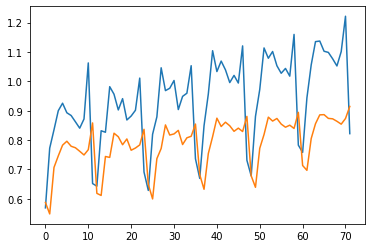

In [20]:
#Graficamos los "y" reales y los "y" predichos
## Se ve peor que con la red anterior porque se le dijo que solo se comparara con el mes anterior, por lo que la tendencia
## podría ser a cualquier lado, hacia arriba o hacia abajo.
## Lo correcto es agregar mpas temporalidades.
plt.plot(y_test)
plt.plot(y_prediccion)

In [ ]:
#Vamos a mejorar la predicción con una técnica de Rolling Windows para considerar más features al entrenar